In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#### Transforming Categorical Inputs.

In [2]:
df_encoded = pd.read_csv("df_cleaned.csv")

for col in ['Sex', 'Race', 'Label']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

In [3]:
df_encoded

,Age,Sex,Race,Omega_Score,AFP,Angiopoietin-2,AXL,CA-125,CA 15-3,CA19-9,...,sEGFR,sFas,SHBG,sHER2/sEGFR2/sErbB2,sPECAM-1,TGFa,Thrombospondin-2,TIMP-1,TIMP-2,Label
0,60.0,1,2,2.96,1583.450,5598.50,3621.04,5.090,19.08,16.452,...,3284.17,204.792,55.06,6832.07,9368.53,16.086,21863.74,56428.71,39498.82,0
1,59.0,0,2,2.45,715.308,20936.35,2772.96,7.270,10.04,40.910,...,1911.81,204.792,72.92,5549.47,6224.55,16.086,29669.66,73940.49,41277.09,0
2,69.0,0,2,1.22,4365.530,2350.93,4120.77,4.854,16.96,16.452,...,1743.94,204.792,173.78,3698.16,4046.48,179.030,6020.47,22797.28,28440.60,0
3,70.0,0,2,1.64,715.308,1604.34,2029.96,5.390,8.31,16.452,...,1059.24,204.792,29.47,5856.00,6121.93,16.086,4331.02,20441.19,25896.73,0
4,43.0,0,2,1.33,801.300,2087.57,2069.17,4.854,11.73,16.452,...,1736.92,204.792,78.07,5447.93,6982.32,16.086,2311.91,56288.51,49425.20,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1812,55.0,0,2,0.98,879.498,1484.70,2096.76,24.820,10.30,42.390,...,2542.26,207.240,115.24,5390.31,8538.58,16.890,599.40,167799.61,50128.60,0
1813,57.0,0,2,3.92,1337.330,1607.90,852.37,5.580,9.80,16.440,...,1670.22,207.240,147.17,7951.03,12966.19,16.890,599.40,123443.76,54066.98,0
1814,60.0,0,2,7.96,879.498,1592.84,1044.45,30.480,8.48,16.440,...,1194.03,207.240,104.63,2396.36,1901.41,16.890,599.40,104070.89,39844.02,0
1815,49.0,0,2,0.81,879.498,5267.95,1445.69,1469.450,23.74,62.260,...,1607.16,207.240,73.55,3079.81,5312.90,16.890,6864.33,110579.24,42921.13,0


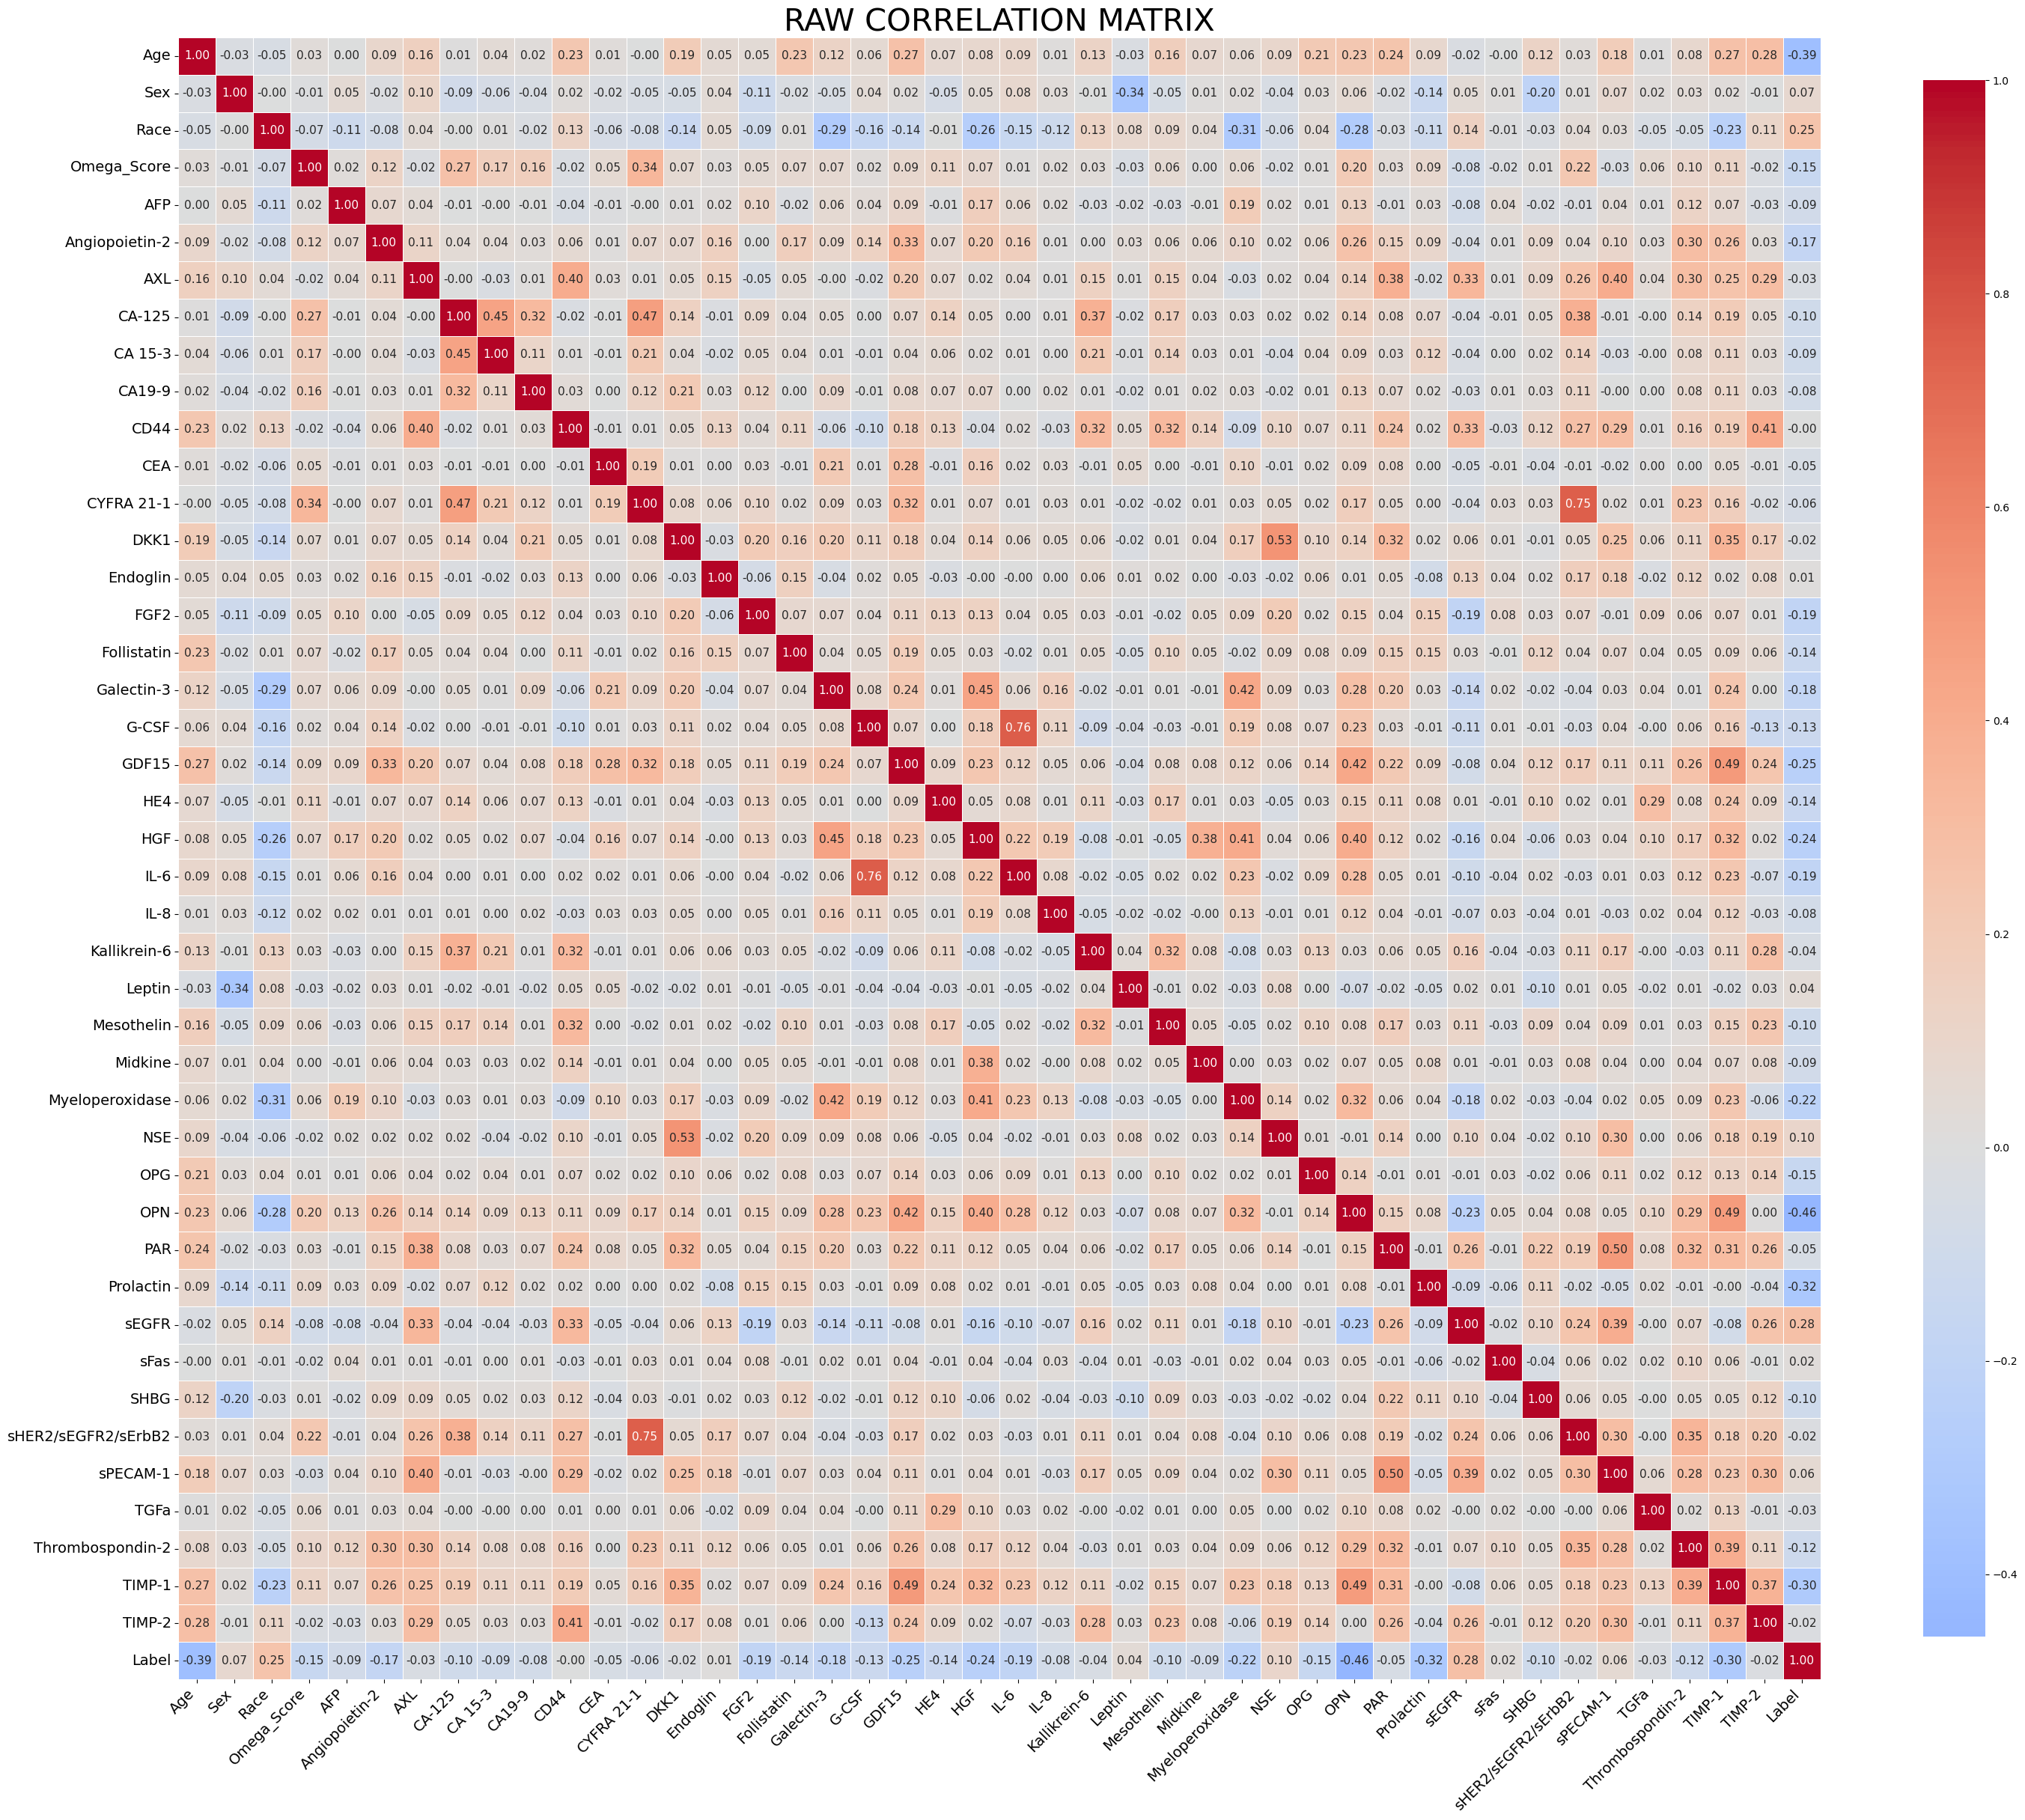

In [4]:
# Calcular la matriz de correlación
matriz_correlacion = df_encoded.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(30, 30))

# Crear el mapa de calor con el color blanco centrado en 0
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',  # Mapa de colores
    cbar=True,
    square=True,
    annot_kws={"size": 11},  # Ajuste del tamaño de las anotaciones
    linewidths=0.5,  # Espacio entre celdas
    center=0,  # Centro del mapa de colores en 0
    cbar_kws={"shrink": 0.7, "aspect": 25}  # Ajustar tamaño de la barra de color
)

# Títulos y ajustes
plt.title('RAW CORRELATION MATRIX', fontsize=30)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.savefig("figures/raw-correlation-matrix.png", format="png", dpi=600)
plt.show()



## Dimensionality Reduction

In [5]:
from sklearn.feature_selection import mutual_info_classif

# X variables predictoras e y variable objetivo
X = df_encoded.drop(columns=['Label'])
y = df_encoded['Label']

In [6]:
# Calcular MI
mutual_information = mutual_info_classif(X, y, discrete_features=False, random_state=42)

mutual_information_df = pd.DataFrame({'Ctica': X.columns, 'MI': mutual_information})
mutual_information_df = pd.DataFrame({'Ctica': X.columns, 'MI': mutual_information}).sort_values(by='MI', ascending=False)
mutual_information_dict = dict(zip(mutual_information_df['Ctica'], mutual_information_df['MI']))

**Threshold = 0.5**

In [7]:
# Eliminar las variables con alta correlación -> para no dar la misma info
correlacion_threshold = 0.5
eliminar_columnas = set()

for col in matriz_correlacion.columns:
    for row in matriz_correlacion.index:
        if row != col and abs(matriz_correlacion.loc[row, col]) > correlacion_threshold:
            # Comparar MI de las dos características correlacionadas
            if mutual_information_dict.get(row, 0) < mutual_information_dict.get(col, 0):
                eliminar_columnas.add(row)
            else:
                eliminar_columnas.add(col)

df_reducido = X.drop(columns=eliminar_columnas)

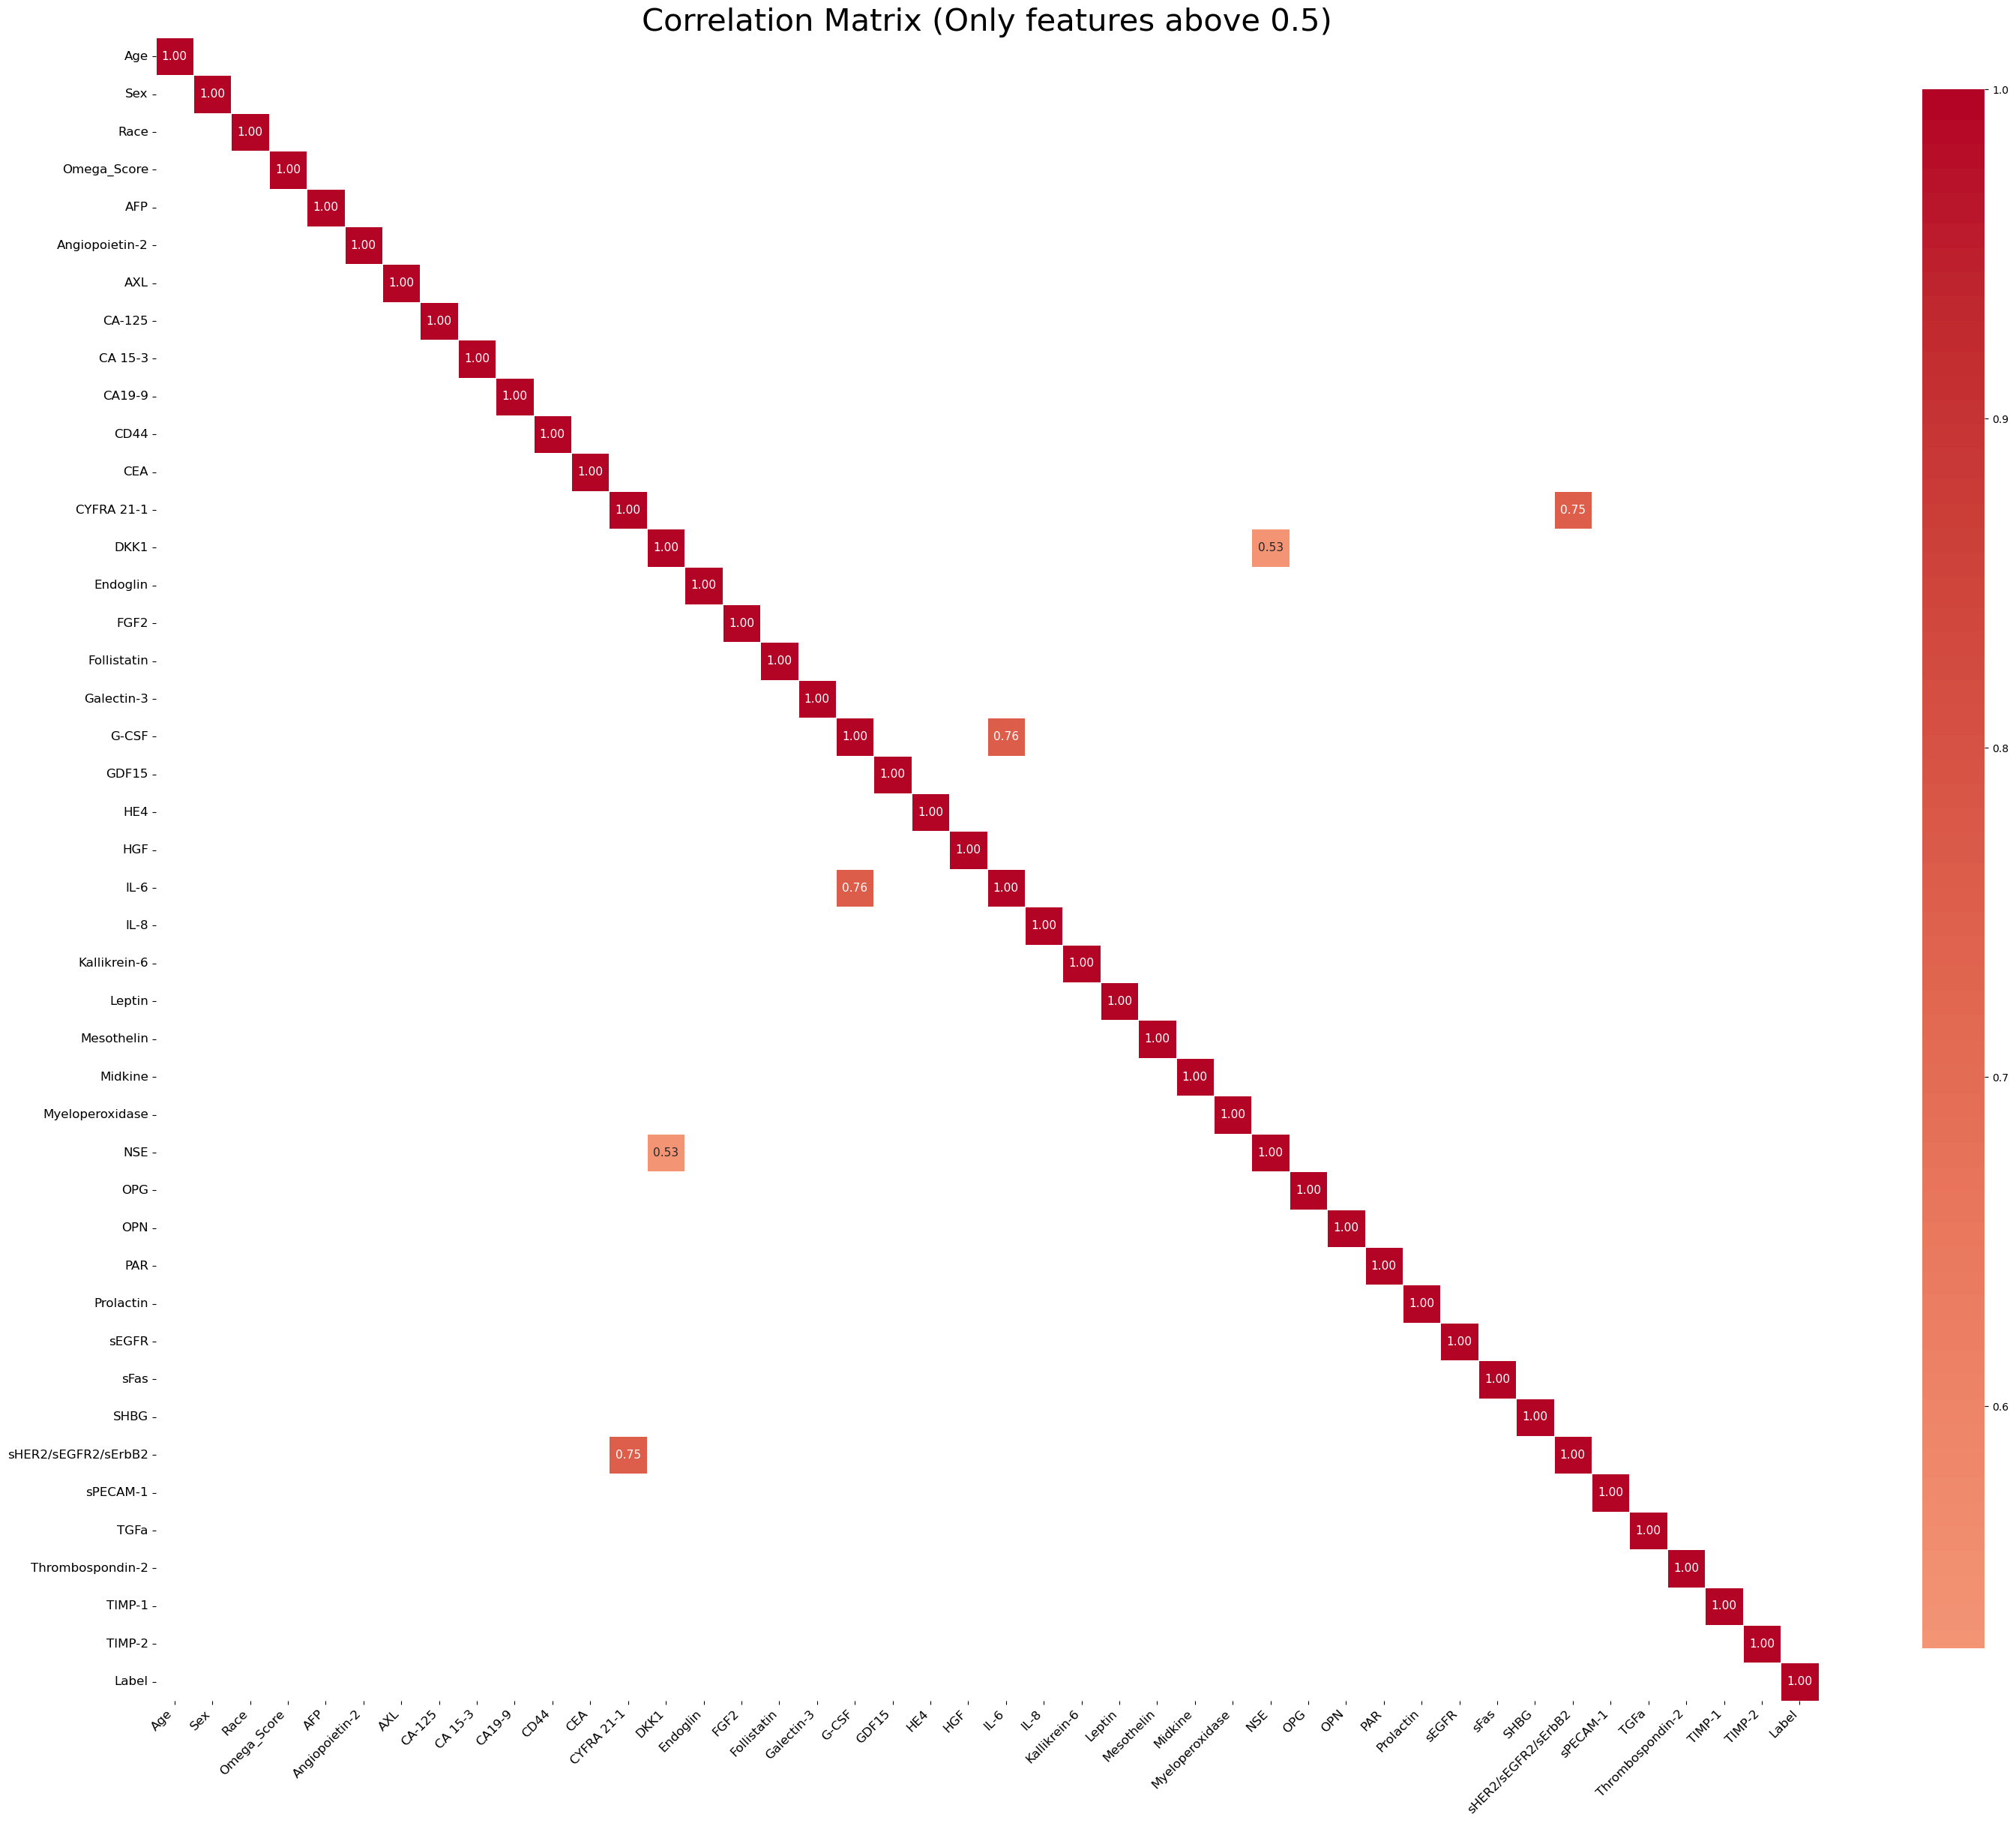

In [8]:
matriz_threshold = matriz_correlacion.copy()
matriz_threshold[(abs(matriz_threshold) < correlacion_threshold)] = np.nan

plt.figure(figsize=(30, 30))

sns.heatmap(
    matriz_threshold,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',  # Mantiene el esquema de colores
    cbar=True,
    square=True,
    annot_kws={"size": 11},  # Ajuste del tamaño de las anotaciones
    linewidths=0.5,  # Espaciado entre celdas
    center=0,  # Centro de colores en 0
    mask=matriz_threshold.isna(),  # Ocultar valores no deseados
    cbar_kws={"shrink": 0.7, "aspect": 25}  # Ajustar tamaño de la barra de color
)

plt.title('Correlation Matrix (Only features above 0.5)', fontsize=30)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.savefig("figures/highlighted-correlation-matrix.png", format="png", dpi=600)
plt.show()



From the pairs of features above the threshold, we determined which one in each pair is more correlated with the label, and we kept it.

#### Discarted features after MI.

In [9]:
eliminar_columnas

{'DKK1', 'G-CSF', 'sHER2/sEGFR2/sErbB2'}

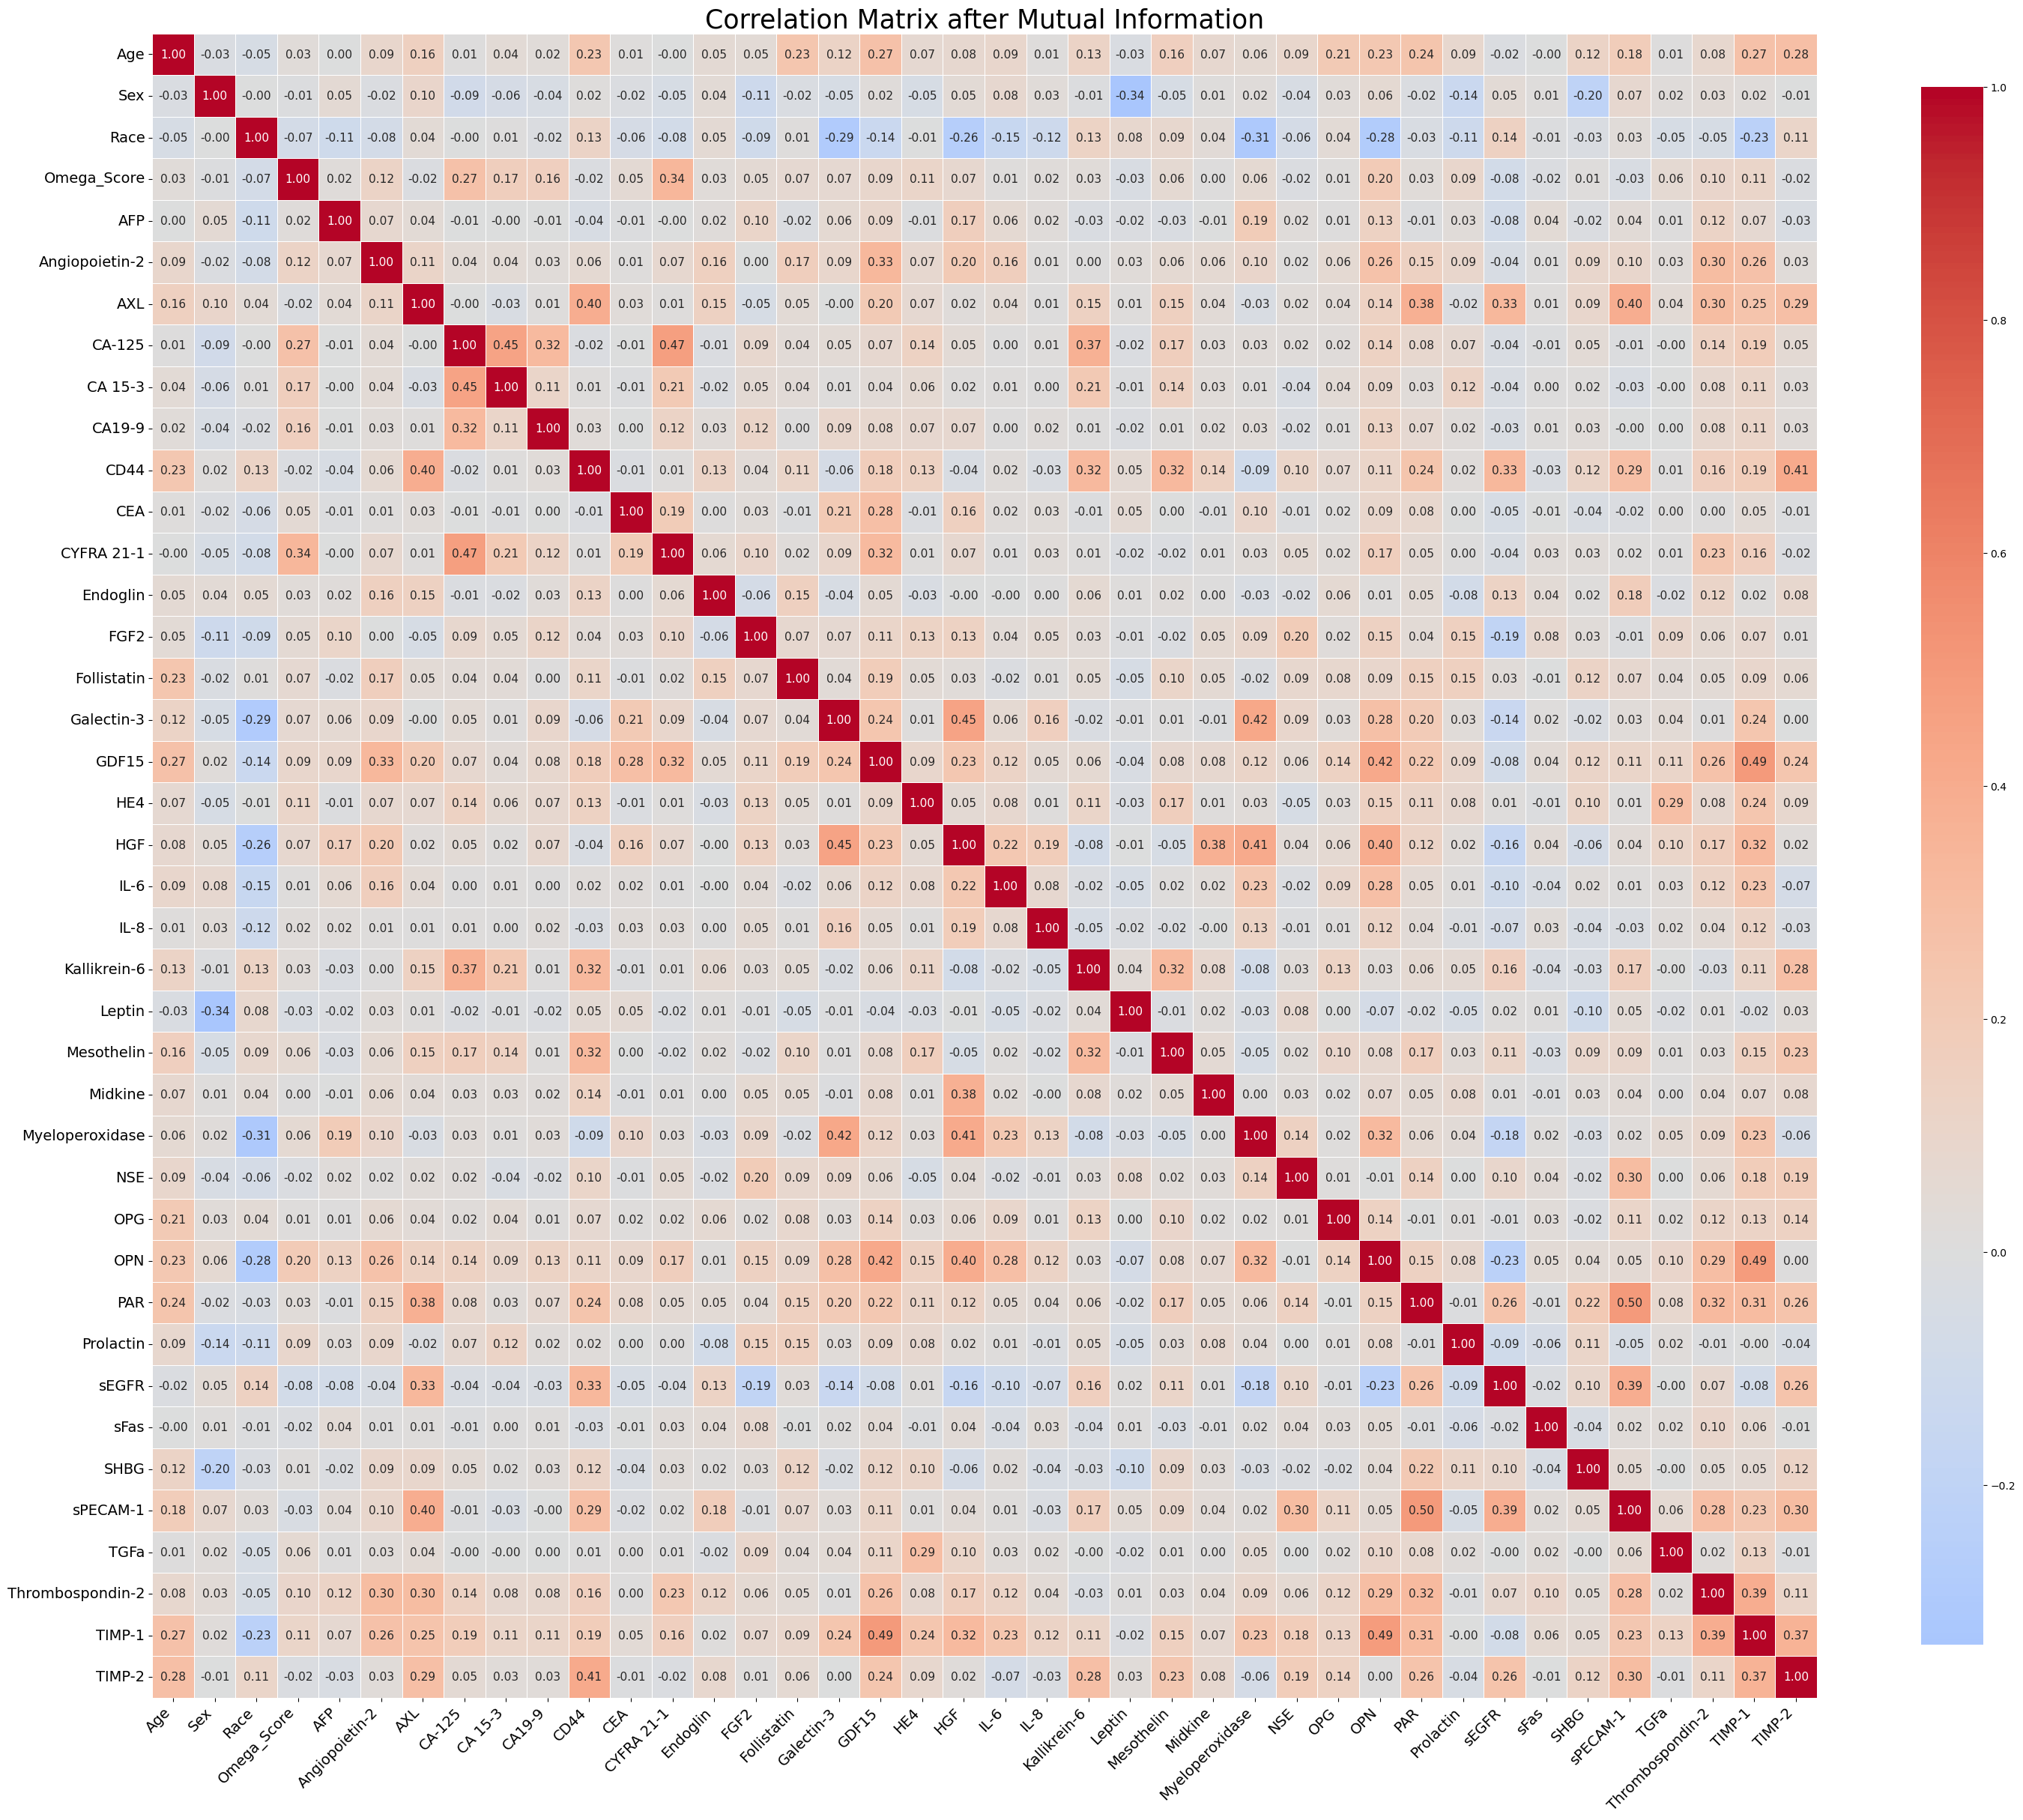

In [10]:
# Calcular la matriz de correlación
matriz_correlacion = df_reducido.corr()

# Configurar el tamaño del gráfico
plt.figure(figsize=(30, 30))

# Crear el mapa de calor con el color blanco centrado en 0
sns.heatmap(
    matriz_correlacion,
    annot=True,
    fmt=".2f",
    cmap='coolwarm',  # Mapa de colores
    cbar=True,
    square=True,
    annot_kws={"size": 11},  # Ajuste del tamaño de las anotaciones
    linewidths=0.5,  # Espacio entre celdas
    center=0,  # Centro del mapa de colores en 0
    cbar_kws={"shrink": 0.7, "aspect": 25}  # Ajustar tamaño de la barra de color
)

# Títulos y ajustes
plt.title('Correlation Matrix after Mutual Information', fontsize=25)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Mostrar el gráfico
plt.tight_layout()
plt.savefig("figures/mutual-information-matrix-correlation.png", format="png", dpi=600)
plt.show()



The resultant dataset has 40 features.

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [3, 5, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0],
    "colsample_bytree": [0.6, 0.8, 1.0],
    "gamma": [0, 0.1, 0.2, 0.3],
    "min_child_weight": [1, 3, 5, 7]
}

xgb = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    use_label_encoder=False,
    random_state=42
)

random_search = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=param_dist,
    n_iter=50,
    scoring="accuracy",
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=1
)

random_search.fit(X, y)

best_model = random_search.best_estimator_
print(random_search.best_params_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


C:\Users\damia\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:03:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


{'subsample': 1.0, 'n_estimators': 400, 'min_child_weight': 7, 'max_depth': 10, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 1.0}


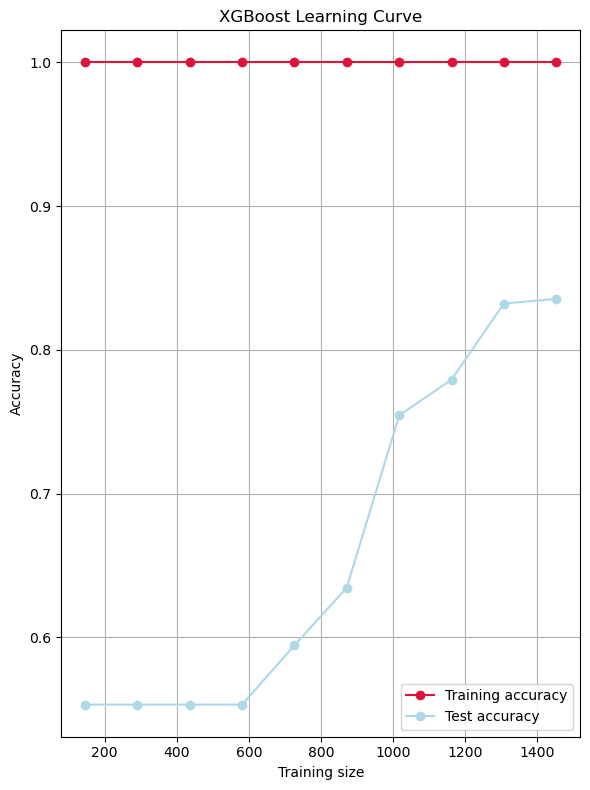

In [12]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    xgb,
    X,              # df_reducido
    y,              # labels
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.figure(figsize=(6, 8))

plt.plot(
    train_sizes,
    train_mean,
    marker='o',
    color="crimson",
    label="Training accuracy"
)

plt.plot(
    train_sizes,
    test_mean,
    marker='o',
    color="lightblue",
    label="Test accuracy"
)

plt.xlabel("Training size")
plt.ylabel("Accuracy")
plt.title("XGBoost Learning Curve")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("figures/xgboost-learning-curve.png", format="png", dpi=600)
plt.show()



C:\Users\damia\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:03:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy for Feature Selection: 0.9973

              precision    recall  f1-score   support

      Cancer       1.00      1.00      1.00       201
      Normal       1.00      0.99      1.00       163

    accuracy                           1.00       364
   macro avg       1.00      1.00      1.00       364
weighted avg       1.00      1.00      1.00       364



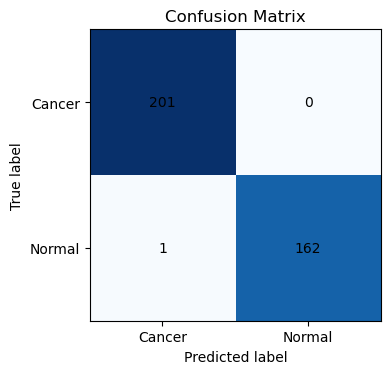

In [13]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# Entrenamiento
xgb.fit(X_train, y_train)

# Predicción
y_pred = xgb.predict(X_test)

# Métricas
acc = accuracy_score(y_test, y_pred)

labels = ["Cancer", "Normal"]

print(f"XGBoost Accuracy for Feature Selection: {acc:.4f}\n")

print(
    classification_report(
        y_test,
        y_pred,
        target_names=labels,
        digits=2
    )
)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(4, 4))
plt.imshow(cm, cmap="Blues")

plt.title("Confusion Matrix")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.xticks([0, 1], labels)
plt.yticks([0, 1], labels)

# Anotar valores
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(
            j, i, cm[i, j],
            ha="center", va="center",
            color="black",
            fontsize=10,
        )

plt.tight_layout()
plt.savefig("figures/confusion-matrix-feature-selection-xgboost.png", format="png", dpi=600)
plt.show()



In [14]:
# Obtener el modelo XGBoost ya entrenado
booster = xgb.get_booster()

# Obtener las importancias de las características según el tipo 'gain'
importancias_gain = booster.get_score(importance_type='gain')

In [15]:
importancias_gain_sorted = sorted(importancias_gain.items(),key=lambda x:x[1], reverse = True)
importancias_gain_sorted

[('IL-8', 46.76738357543945),
 ('OPN', 10.936568260192871),
 ('Age', 7.644739151000977),
 ('NSE', 7.25308895111084),
 ('IL-6', 7.189269542694092),
 ('Prolactin', 6.074752330780029),
 ('Omega_Score', 5.721157550811768),
 ('TGFa', 4.587446689605713),
 ('DKK1', 3.723296642303467),
 ('CA-125', 3.127668857574463),
 ('CA19-9', 3.1030848026275635),
 ('OPG', 2.948390245437622),
 ('Race', 2.7137300968170166),
 ('CYFRA 21-1', 2.567401170730591),
 ('HGF', 2.5256054401397705),
 ('AXL', 2.0283942222595215),
 ('sEGFR', 1.969687819480896),
 ('Myeloperoxidase', 1.948306918144226),
 ('Midkine', 1.9038938283920288),
 ('GDF15', 1.8151862621307373),
 ('CD44', 1.68659245967865),
 ('Thrombospondin-2', 1.6322163343429565),
 ('G-CSF', 1.26168692111969),
 ('FGF2', 1.1130796670913696),
 ('Kallikrein-6', 1.0848006010055542),
 ('sFas', 1.0484213829040527),
 ('TIMP-1', 0.9344210624694824),
 ('Leptin', 0.8830862045288086),
 ('sPECAM-1', 0.8422849178314209),
 ('Mesothelin', 0.8375056385993958),
 ('TIMP-2', 0.8231697

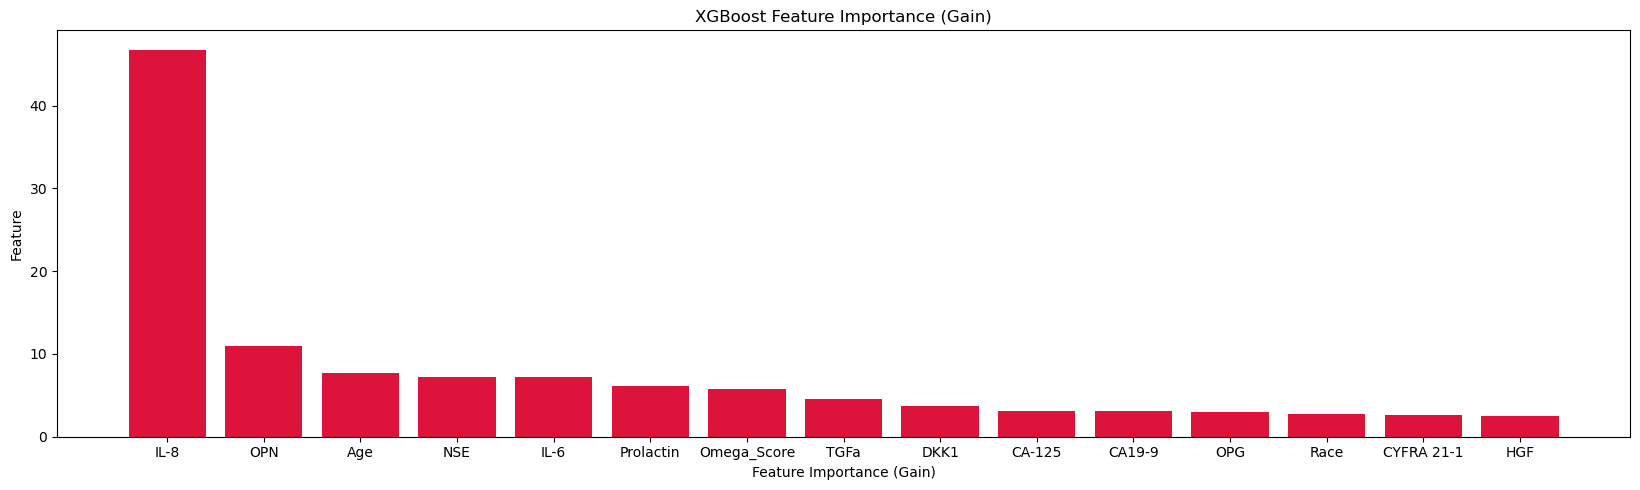

In [16]:
# Separar features y valores de gain
k = 15
features = [f for f, g in importancias_gain_sorted]
gains = [g for f, g in importancias_gain_sorted]
features = features[:k]
gains = gains[:k]

plt.figure(figsize=(1.1 * len(features) ,5))

plt.bar(
    features,
    gains,
    color="crimson"
)

plt.xlabel("Feature Importance (Gain)")
plt.ylabel("Feature")
plt.title("XGBoost Feature Importance (Gain)")

# Invertir eje Y para que la más importante quede arriba
plt.gca()

plt.tight_layout()
plt.savefig("figures/feature-gain-xgboost.png", format="png", dpi=600)
plt.show()

In [17]:
ranked_features = [f for f, g in importancias_gain_sorted]

In [18]:
X_full = X.copy()
y_full = y.copy()

X_train, X_test, y_train, y_test = train_test_split(
    X_full,
    y_full,
    test_size=0.2,
    stratify=y_full,
    random_state=42
)

k_values = range(1, len(ranked_features) + 1)
accuracies = []

for k in k_values:
    selected_features = ranked_features[:k]

    X_train_k = X_train[selected_features]
    X_test_k = X_test[selected_features]

    xgb.fit(X_train_k, y_train)
    y_pred = xgb.predict(X_test_k)

    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

C:\Users\damia\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\damia\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\damia\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:03:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
C:\Users\damia\anaconda3\Lib\site-packages\

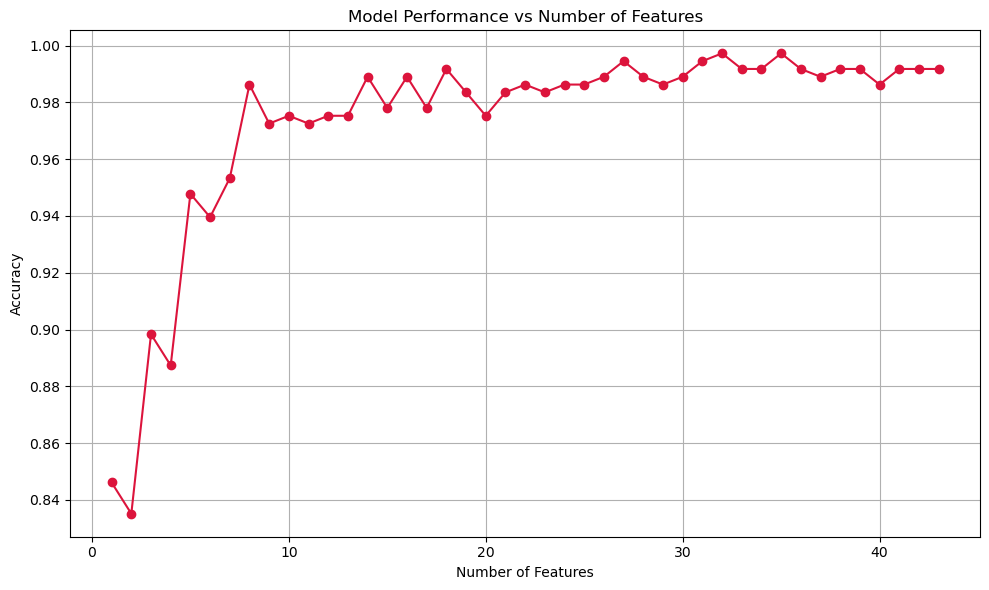

In [19]:
plt.figure(figsize=(10, 6))

plt.plot(
    k_values,
    accuracies,
    marker="o",
    color="crimson"
)

plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("Model Performance vs Number of Features")
plt.grid(True)

plt.tight_layout()
plt.savefig("figures/xgboost-performance-by-features.png", format="png", dpi=600)
plt.show()

Optimal k-features: 8

In [20]:
df_model = X[['Age',"IL-8","OPN","NSE","IL-6","Prolactin","Omega_Score","TGFa"]]

In [21]:
df_model

,Age,IL-8,OPN,NSE,IL-6,Prolactin,Omega_Score,TGFa
0,60.0,8.238,56516.58,12.04,11.316,11606.60,2.96,16.086
1,59.0,29.820,61001.39,23.25,21.280,14374.99,2.45,16.086
2,69.0,35.060,88896.24,12.84,11.316,38375.00,1.22,179.030
3,70.0,15.890,42549.61,22.79,15.300,12072.51,1.64,16.086
4,43.0,8.238,24274.11,27.20,11.316,23718.17,1.33,16.086
...,...,...,...,...,...,...,...,...
1812,55.0,12.830,38603.84,9.72,10.500,58266.97,0.98,16.890
1813,57.0,8.274,29994.01,79.03,10.500,187828.79,3.92,16.890
1814,60.0,11.160,93601.15,4.30,10.500,241440.02,7.96,16.890
1815,49.0,20.540,145116.62,19.52,20.330,140145.70,0.81,16.890


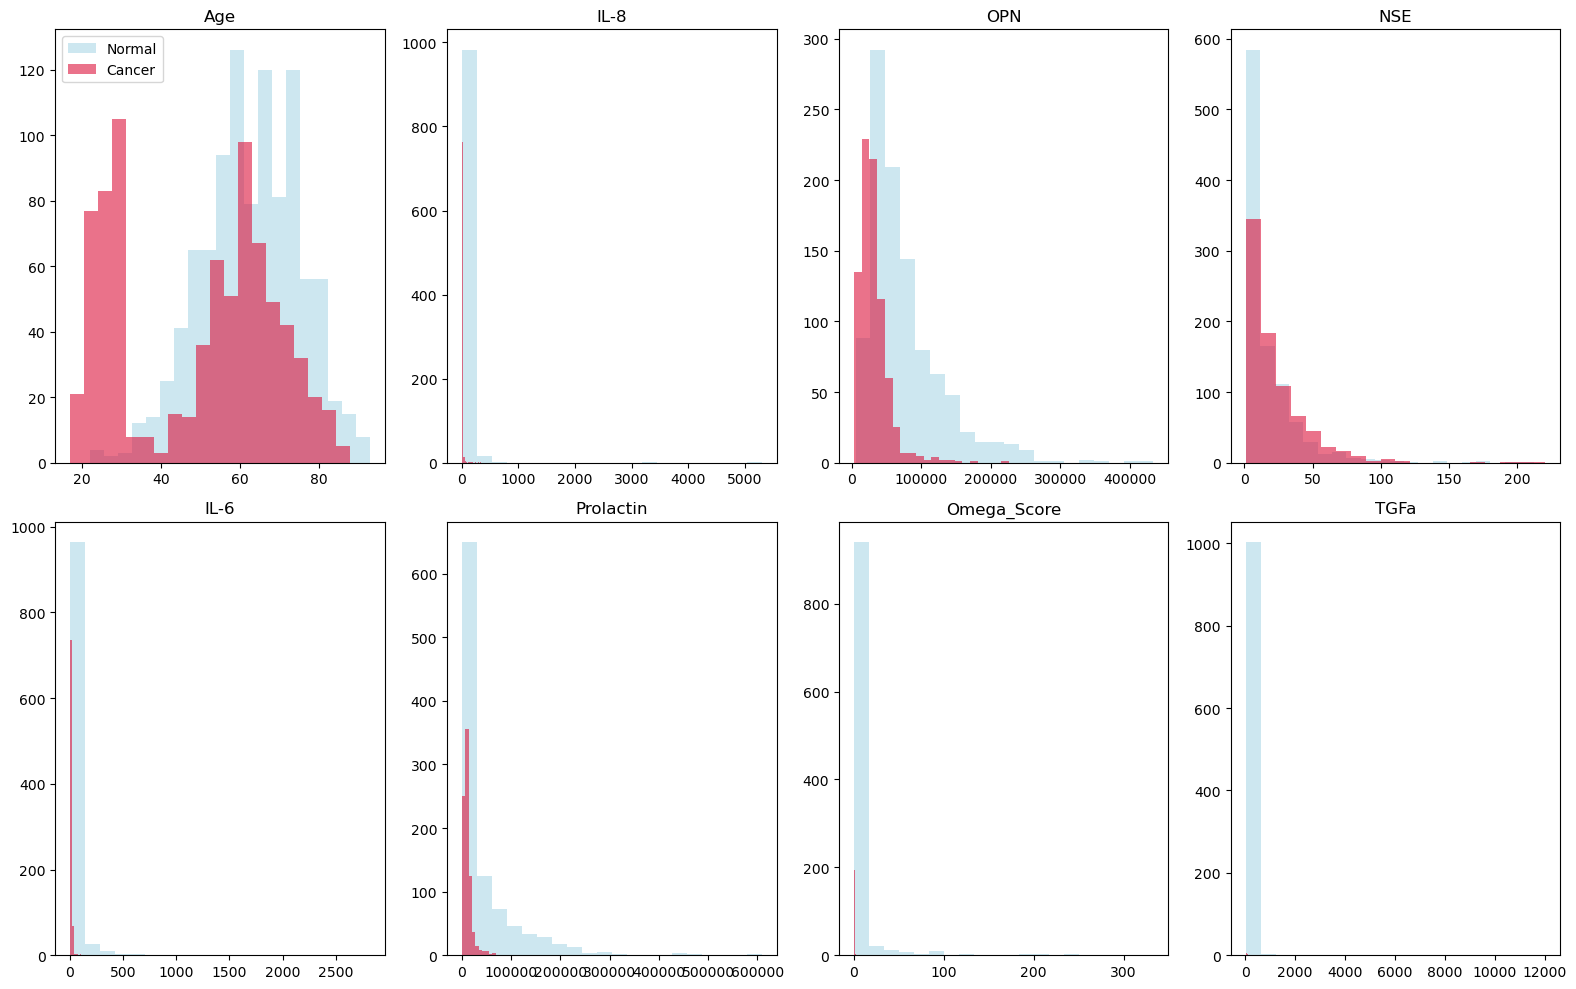

In [22]:
# Unimos X y Y por índice para facilitar el manejo 
df_plot = df_model.copy() 
df_plot["Label"] = y.map({0: "Normal", 1: "Cancer"})

# Configuración del grid 
n_cols = 4 
n_rows = (df_model.shape[1] + n_cols - 1) // n_cols 

plt.figure(figsize=(16, 10)) 
for i, col in enumerate(df_model.columns, 1): 
    plt.subplot(n_rows, n_cols, i) 
    
    # Histogramas por clase 
    df_plot[df_plot["Label"] == "Normal"][col].plot.hist(bins=20, alpha=0.6, color="lightblue", label="Normal" ) 
    df_plot[df_plot["Label"] == "Cancer"][col].plot.hist( bins=20, alpha=0.6, color="crimson", label="Cancer" ) 
    
    plt.title(col) 
    plt.xlabel("") 
    plt.ylabel("") 
    
    if i == 1: 
        plt.legend() 
    
plt.tight_layout()
plt.savefig("figures/final-features-xgboost.png", format="png", dpi=600)
plt.show()

In [23]:
df_plot.to_csv("df_model_.csv", index = False)